- title: Visualize Historical Time Comparisons
- slug: visualize-historical-time-comparisons
- summary: Examples of visualizations such as line, bar and heatmaps to showcase comparisons at points in time of a dataset
- date: 2018-07-22 18:00  
- category: Data Visualizations
- subcategory: Best Practices
- posttype: Tutorial
- tags: line plots, bar charts, heatmap
- keywords: historical time comparisons python
- authors: Dan Friedman

Often times with datasets, we want to understand the changes in some metric over time. 

For example, if your business recorded sales each day, we may want a comparison of the sales value today versus yesterday, and perhaps this month versus previous months. This is an important comparison because it would help the business understand if sales are growing over time or declining.

There are various types of plots we can use for historical comparisons. I'll detail a few below. 

#### Import Modules

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#### Set Global Styles for Visualizations

In [3]:
sns.set_context('talk')
sns.set_style("darkgrid")

### Example: Historical Flights Data 

In the examples below, I utilize the dataset `flights` provided in the Seaborn visualization library. 

Each month, from 1949 to 1960, there was a record of the count of passengers on all flights.

#### Load `flights` Dataset

In [4]:
df_flights = sns.load_dataset('flights')

#### Preview the First 5 Rows of Data

In [5]:
df_flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


#### Change `month` Column to Show Short Month Names

Create a Python dictionary that's a mapping of a month's long name to its short name.

In [6]:
month_long_to_short = {"January": "Jan",
                       "February": "Feb",
                       "March": "Mar",
                       "April": "Apr",
                       "May": "May",
                       "June": "Jun",
                       "July": "Jul",
                       "August": "Aug",
                       "September": "Sep",
                       "October": "Oct",
                       "November": "Nov",
                       "December": "Dec"
                      }

Create a new column called `month` that just shows each month's short name. This will make it easier to display the month's value on a visualization.

In [7]:
df_flights['month'] = df_flights['month'].map(month_long_to_short)

#### Create New Column of `year_month`

Convert `year` and `month` columns to be of string type

In [8]:
df_flights['year'] = df_flights['year'].astype(str)
df_flights['month'] = df_flights['month'].astype(str)

Concatenate columns of `month` and `year` with a space inbetween to create a new column called `month_year`

In [9]:
df_flights['month_year'] = df_flights['month'] + " - " + df_flights['year']

#### Visualize Historical Count of Passengers Per Month

This visualization below shows the change over time in count of passengers per month. 

This visualization can be helpful if we'd like to see a general trend month by month. However, with flights, I'd expect a lot of seasonality in which there's lots of passengers flying on Thanksgiving, Christmas and summer months.

This visualization below is **not** ideal to see the seasonality. It's difficult to compare December of 1950 with December of 1951. The bars are so far apart.

This visualization also has lots of x-tick values that seemed crammed next to one another. I think there are better ways to visualize this data that we'll explore further.

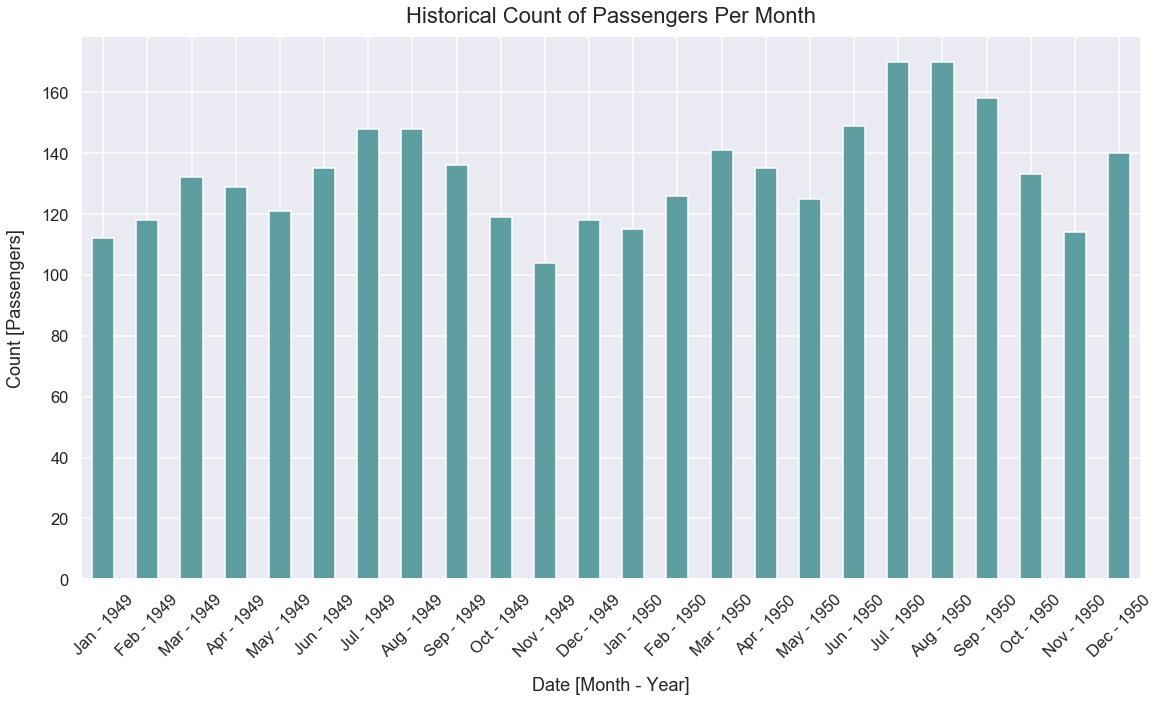

In [10]:
df_flights[df_flights['year']<'1951'].set_index('month_year')['passengers'].plot(kind='bar',
                                                                                figsize=(19, 10),
                                                                                 color='cadetblue',
                                                                                rot=45)
plt.title("Historical Count of Passengers Per Month", y=1.013, fontsize=22)
plt.ylabel("Count [Passengers]", labelpad=16)
plt.xlabel("Date [Month - Year]", labelpad=16);

#### Interpretation of Historical Count of Passengers Per Month

For both 1949 and 1950, the months with the most passengers were July and August. It's likely people traveled more during those times because students had summer breaks and parents could easily travel with their kids. Also, July and August are typically warm summer months - ideal for vacation to tropical places.

#### Visualize Historical Count of Passengers by Month: Month by Month Comparison as Bar Chart

I want to create a visualization to more easily compare the count of passengers by months of various years. 

Therefore, I will pivot my data to the format below so I can create a visualization and see bars each month of several years next to one another. I should be able to easily see January's count of passengers in 1949, 1950 and 1951 all next to one another.

In [11]:
months_in_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [12]:
df_flights_pivoted = df_flights[df_flights['year']<'1952'].pivot(index='month', columns='year', values='passengers').reindex(months_in_order)
df_flights_pivoted

year,1949,1950,1951
month,,,
Jan,112,115,145
Feb,118,126,150
Mar,132,141,178
Apr,129,135,163
May,121,125,172
Jun,135,149,178
Jul,148,170,199
Aug,148,170,199
Sep,136,158,184


With this visualization below, we can now easily compare the count of passengers for each specific month of 1949, 1950 and 1951.

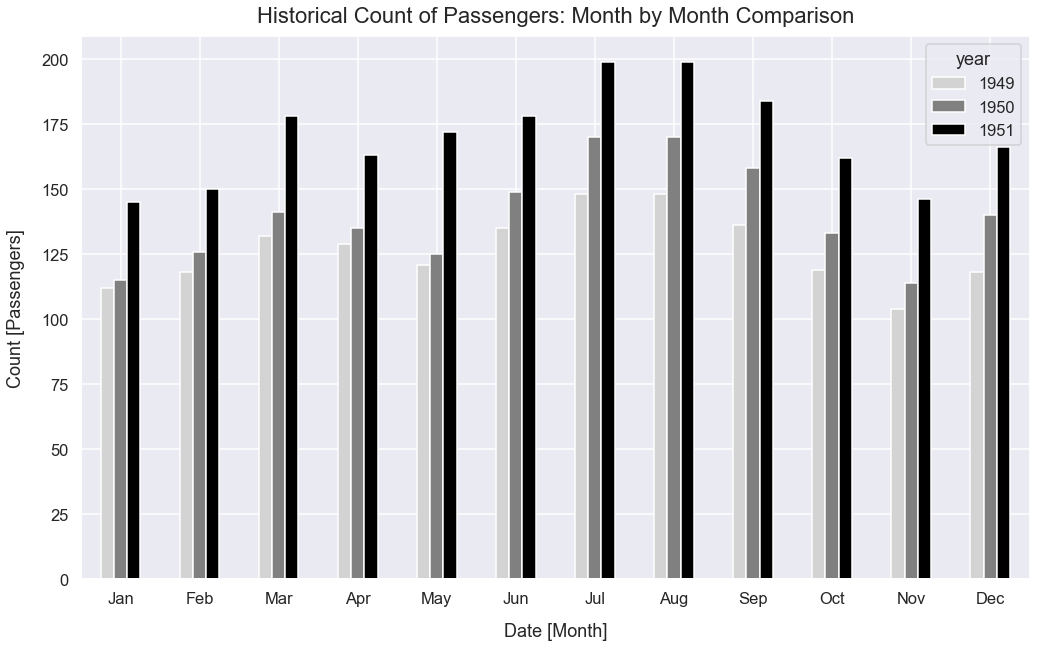

In [13]:
df_flights_pivoted.plot(kind='bar', figsize=(17, 10), color=['lightgray', 'gray', 'black'], rot=0)                                       
plt.title("Historical Count of Passengers: Month by Month Comparison", y=1.013, fontsize=22)
plt.xlabel("Date [Month]", labelpad=16)
plt.ylabel("Count [Passengers]", labelpad=16);

#### Interpretation of Historical Count of Passengers: Month by Month Comaprison

There was an increase in the count of passengers by each month every year from 1949 to 1951.

July and August are the months with typically the most passengers every year.

#### Visualize Historical Count of Passengers by Month: Month by Month Comparison as Line Plot

This visualization below is similar to the one above in that we easily compare counts of passengers by month. 

This line plot works well because we have no intersections between lines.

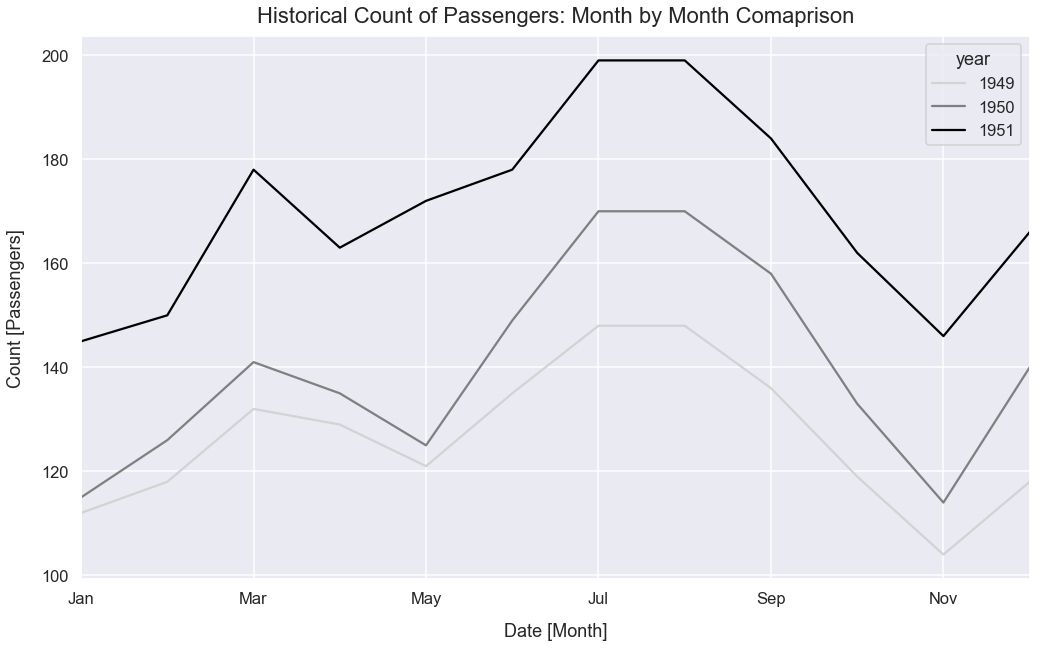

In [14]:
df_flights_pivoted.plot(kind='line', figsize=(17, 10), color=['lightgray', 'gray', 'black'])
plt.title("Historical Count of Passengers: Month by Month Comaprison", y=1.013, fontsize=22)
plt.xlabel("Date [Month]", labelpad=16)
plt.ylabel("Count [Passengers]", labelpad=16);                                                                      

#### Visualize Cumulative Sum of Passengers Each Year 

Below we plot the running total of passengers on flights, by each year, with each year starting in January.

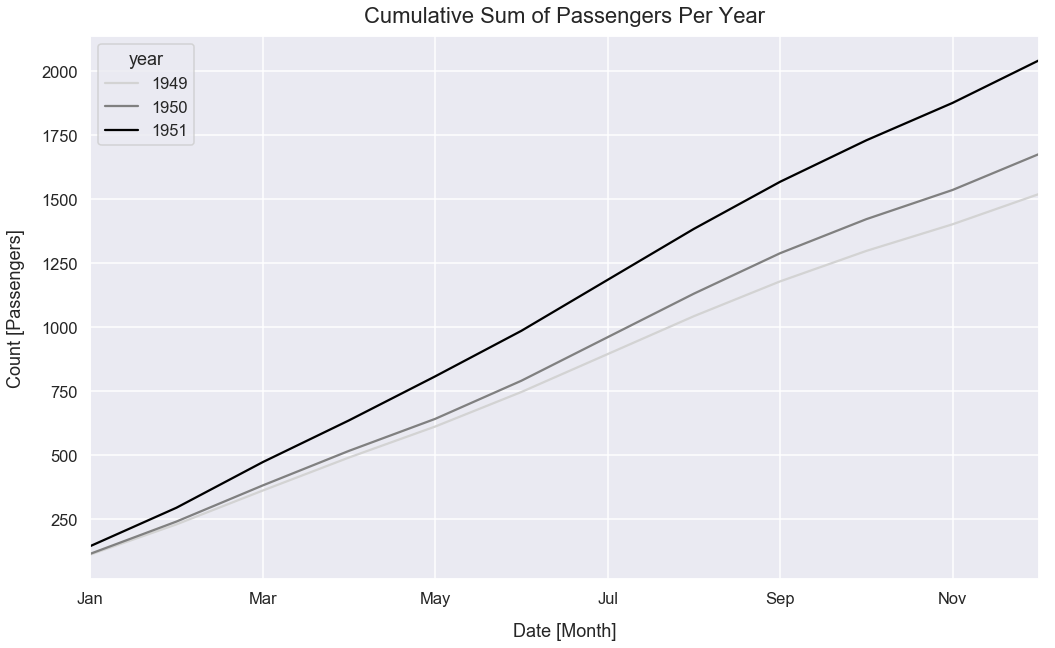

In [15]:
df_flights_pivoted.cumsum().plot(kind='line', figsize=(17, 10), color=['lightgray', 'gray', 'black'])
plt.title("Cumulative Sum of Passengers Per Year", y=1.013, fontsize=22)
plt.xlabel("Date [Month]", labelpad=16)
plt.ylabel("Count [Passengers]", labelpad=16);

#### Interpretation of Cumulative Sum of Passengers Per Year

Each successive year, there is an increase in the count of passengers on flights at any point in time.

There was a larger increase in total passengers who had flown year-to-date from 1951 to 1950 than 1950 to 1949 at any point in time. 

#### Heatmap of Passenger Counts on Flights

A heatmap is also ideal for this type of data.

Below, we can easily see the change in count of passengers per month over the years. We can also easily see the change of passengers per month for a single year or over multiple years.

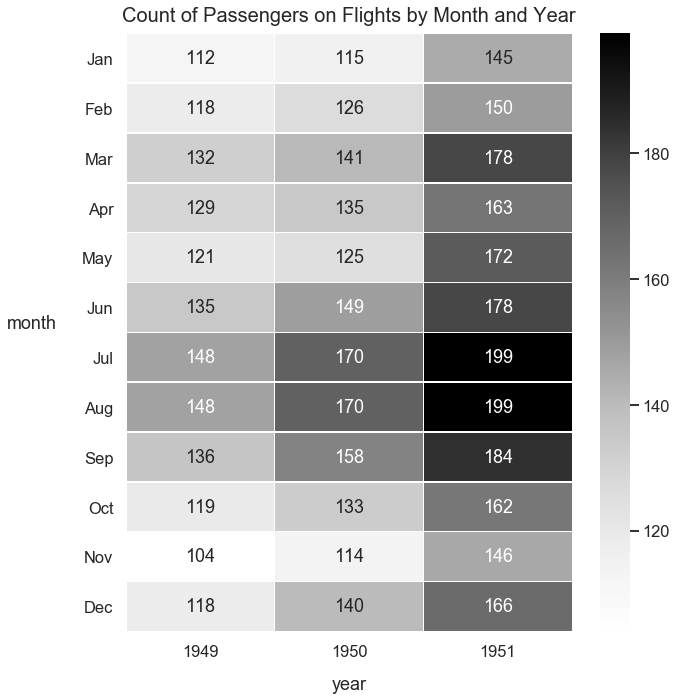

In [28]:
figure, axes = plt.subplots(figsize=(10, 11))
sns.heatmap(df_flights_pivoted, annot=True, fmt="d", linewidths=.5, ax=axes, cmap="Greys")
axes.axes.set_title("Count of Passengers on Flights by Month and Year", fontsize=20, y=1.01)
axes.axes.set_ylabel("month", labelpad=50, rotation=0)
axes.axes.set_xlabel("year", labelpad=16);
plt.yticks(rotation=0);

#### Interpretation of Heatmap of Passenger Counts on Flights

This visualization helps detail flights as a cyclical business. Typically, the summer months of June, July and August and the first fall month of September have the most passengers on flights.

March and December are also common peaks for count of passengers compared to other months.